# Experiments with Information Bottleneck

## Preliminary steps

#### Necessary imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from infoplane import IB
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, SVG
from keras.models import Model, load_model
from sklearn.metrics import classification_report
from keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Flatten, concatenate, LSTM, Reshape

Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = (7,7)

In [3]:
np.random.seed(42)

#### Installation of NPEET

In [4]:
%%bash

git clone https://github.com/gregversteeg/NPEET.git

fatal: destination path 'NPEET' already exists and is not an empty directory.


## MNIST preprocessing

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [8]:
X_train = X_train[0:1000]
X_test = X_test[0:100]
y_train = y_train[0:1000]
y_test = y_test[0:100]

## Definition of models

In [9]:
def getFCNN(X, Y, input_layer, output_layer, hidden_units):
    """Make a fully connected network with arbitrary configuration"""
    x = Dense(hidden_units[0], activation="elu")(input_layer)
    for a in range(1, len(hidden_units)):
        x = Dense(hidden_units[a], activation="elu")(x) 
    m = Model(input_layer, output_layer(x))
    m.compile(optimizer="adam", loss="mae")
    return(m)

## Information plane plots

In [10]:
ib = IB()

In [11]:
input_layer = lambda : Input(shape=(784,))
output_layer = lambda : Dense(1, activation="linear")

In [12]:
hidden_units = [256,128,64,32]

In [13]:
def make_plane(n, hu, colors, ff):
    def once(i):
        print(i)
        snp_mod = getFCNN(X_train, y_train, input_layer(), output_layer(), hu)
        snp_mod = ff(snp_mod)
        reps = IB.get_all_reps(snp_mod)
        coords = []
        for b in reps:
            coords.append(ib.coords(X_test, y_test, b(snp_mod).predict(X_test)))
        cc = IB.to_plane(coords)
        cc["color"] = colors
        return(cc)
    return(pd.concat([once(a) for a in range(n)]))

In [14]:
def fit_model(m,n):
    m.fit(X_train, y_train, epochs=n, shuffle="batch")
    return(m)

##### Before fitting

In [15]:
snp_b4 = make_plane(10, hidden_units, ["black", "red", "green", "blue", "yellow"], lambda x: x)

0
1
2
3
4
5
6
7
8
9


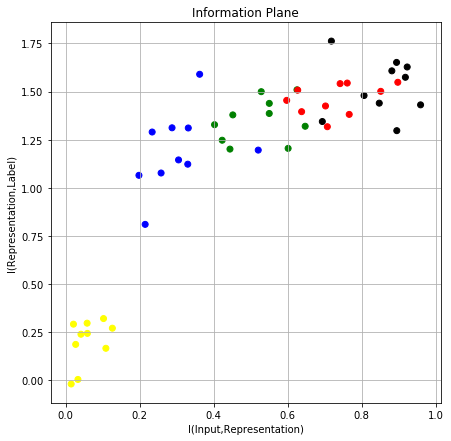

In [16]:
IB.plot(snp_b4)

##### After 100 epochs

In [17]:
snp_100 = make_plane(
    10, hidden_units, ["black", "red", "green", "blue", "yellow"], 
    lambda x: fit_model(x, 100)
)

0
Epoch 1/100
1000/1000 [==============================] - 0s - loss: 2.0099     
Epoch 2/100
1000/1000 [==============================] - 0s - loss: 1.3315     
Epoch 3/100
1000/1000 [==============================] - 0s - loss: 1.0960     
Epoch 4/100
1000/1000 [==============================] - 0s - loss: 1.0117     
Epoch 5/100
1000/1000 [==============================] - 0s - loss: 0.9027     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.7648     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6712     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.6271     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.6059     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5355     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.5138     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4758     
Epoch 13/100
1000/1000 [===========

1000/1000 [==============================] - 0s - loss: 1.2868     
Epoch 3/100
1000/1000 [==============================] - 0s - loss: 1.0708     
Epoch 4/100
1000/1000 [==============================] - 0s - loss: 0.9101     
Epoch 5/100
1000/1000 [==============================] - 0s - loss: 0.8291     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.7347     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6358     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.6036     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5566     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5551     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4885     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4608     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4170     
Epoch 14/100
1000/1000 [========================

1000/1000 [==============================] - 0s - loss: 1.0726     
Epoch 4/100
1000/1000 [==============================] - 0s - loss: 0.9931     
Epoch 5/100
1000/1000 [==============================] - 0s - loss: 0.8655     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.7391     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6715     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.5997     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5555     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5132     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4491     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4152     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4054     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.3774     
Epoch 15/100
1000/1000 [=======================

1000/1000 [==============================] - 0s - loss: 1.1013     
Epoch 5/100
1000/1000 [==============================] - 0s - loss: 0.8858     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.7932     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6746     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.6217     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5798     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5155     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.5039     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4575     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4188     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.4021     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.3527     
Epoch 16/100
1000/1000 [======================

1000/1000 [==============================] - 0s - loss: 0.8131     
Epoch 6/100
1000/1000 [==============================] - 0s - loss: 0.8314     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6427     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.6110     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5360     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.4936     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4645     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4452     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4774     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.3969     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.3811     
Epoch 16/100
1000/1000 [==============================] - 0s - loss: 0.3349     
Epoch 17/100
1000/1000 [=====================

1000/1000 [==============================] - 0s - loss: 0.8081     
Epoch 7/100
1000/1000 [==============================] - 0s - loss: 0.6922     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.6317     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5845     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5856     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.5190     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4785     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4058     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.3970     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.3538     
Epoch 16/100
1000/1000 [==============================] - 0s - loss: 0.3969     
Epoch 17/100
1000/1000 [==============================] - 0s - loss: 0.3321     
Epoch 18/100
1000/1000 [====================

1000/1000 [==============================] - 0s - loss: 0.6831     
Epoch 8/100
1000/1000 [==============================] - 0s - loss: 0.6298     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5694     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5082     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4467     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4171     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4048     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.3878     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.3138     
Epoch 16/100
1000/1000 [==============================] - 0s - loss: 0.3302     
Epoch 17/100
1000/1000 [==============================] - 0s - loss: 0.3120     
Epoch 18/100
1000/1000 [==============================] - 0s - loss: 0.2829     
Epoch 19/100
1000/1000 [===================

1000/1000 [==============================] - 0s - loss: 0.5626     
Epoch 9/100
1000/1000 [==============================] - 0s - loss: 0.5623     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5138     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4457     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4042     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.3920     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.4038     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.3935     
Epoch 16/100
1000/1000 [==============================] - 0s - loss: 0.3503     
Epoch 17/100
1000/1000 [==============================] - 0s - loss: 0.3275     
Epoch 18/100
1000/1000 [==============================] - 0s - loss: 0.3241     
Epoch 19/100
1000/1000 [==============================] - 0s - loss: 0.2884     
Epoch 20/100
1000/1000 [==================

1000/1000 [==============================] - 0s - loss: 0.5592     
Epoch 10/100
1000/1000 [==============================] - 0s - loss: 0.5160     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4758     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4774     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.3985     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.3863     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.4110     
Epoch 16/100
1000/1000 [==============================] - 0s - loss: 0.3634     
Epoch 17/100
1000/1000 [==============================] - 0s - loss: 0.3220     
Epoch 18/100
1000/1000 [==============================] - 0s - loss: 0.3169     
Epoch 19/100
1000/1000 [==============================] - 0s - loss: 0.2981     
Epoch 20/100
1000/1000 [==============================] - 0s - loss: 0.2670     
Epoch 21/100
1000/1000 [=================

1000/1000 [==============================] - 0s - loss: 0.4984     
Epoch 11/100
1000/1000 [==============================] - 0s - loss: 0.4488     
Epoch 12/100
1000/1000 [==============================] - 0s - loss: 0.4578     
Epoch 13/100
1000/1000 [==============================] - 0s - loss: 0.4193     
Epoch 14/100
1000/1000 [==============================] - 0s - loss: 0.4331     
Epoch 15/100
1000/1000 [==============================] - 0s - loss: 0.3800     
Epoch 16/100
1000/1000 [==============================] - 0s - loss: 0.3414     
Epoch 17/100
1000/1000 [==============================] - 0s - loss: 0.3346     
Epoch 18/100
1000/1000 [==============================] - 0s - loss: 0.2961     
Epoch 19/100
1000/1000 [==============================] - 0s - loss: 0.3139     
Epoch 20/100
1000/1000 [==============================] - 0s - loss: 0.3260     
Epoch 21/100
1000/1000 [==============================] - 0s - loss: 0.2927     
Epoch 22/100
1000/1000 [=================

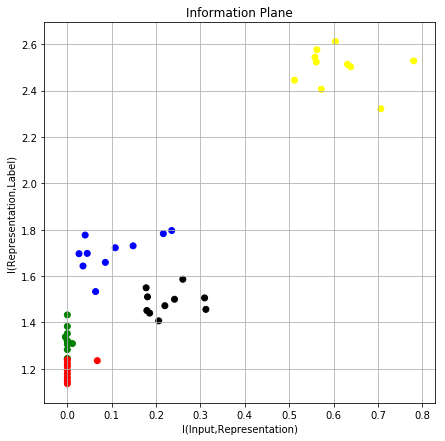

In [18]:
IB.plot(snp_100)

##### After 1000 epochs

In [19]:
snp_1000 = make_plane(
    10, hidden_units, ["black", "red", "green", "blue", "yellow"], 
    lambda x: fit_model(x, 1000)
)

0
Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 2.0146     
Epoch 2/1000
1000/1000 [==============================] - 0s - loss: 1.3669     
Epoch 3/1000
1000/1000 [==============================] - 0s - loss: 1.1028     
Epoch 4/1000
1000/1000 [==============================] - 0s - loss: 0.8996     
Epoch 5/1000
1000/1000 [==============================] - 0s - loss: 0.8275     
Epoch 6/1000
1000/1000 [==============================] - 0s - loss: 0.7401     
Epoch 7/1000
1000/1000 [==============================] - 0s - loss: 0.6604     
Epoch 8/1000
1000/1000 [==============================] - 0s - loss: 0.5511     
Epoch 9/1000
1000/1000 [==============================] - 0s - loss: 0.4911     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 0.4793     
Epoch 11/1000
1000/1000 [==============================] - 0s - loss: 0.4430     
Epoch 12/1000
1000/1000 [==============================] - 0s - loss: 0.3948     
Epoch 13/1000
1000/1000

1000/1000 [==============================] - 0s - loss: 0.0695     
Epoch 101/1000
1000/1000 [==============================] - 0s - loss: 0.0746     
Epoch 102/1000
1000/1000 [==============================] - 0s - loss: 0.0612     
Epoch 103/1000
1000/1000 [==============================] - 0s - loss: 0.0679     
Epoch 104/1000
1000/1000 [==============================] - 0s - loss: 0.0626     
Epoch 105/1000
1000/1000 [==============================] - 0s - loss: 0.0611     
Epoch 106/1000
1000/1000 [==============================] - 0s - loss: 0.0616     
Epoch 107/1000
1000/1000 [==============================] - 0s - loss: 0.0544     
Epoch 108/1000
1000/1000 [==============================] - 0s - loss: 0.0623     
Epoch 109/1000
1000/1000 [==============================] - 0s - loss: 0.0547     
Epoch 110/1000
1000/1000 [==============================] - 0s - loss: 0.0576     
Epoch 111/1000
1000/1000 [==============================] - 0s - loss: 0.0543     
Epoch 112/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0452     
Epoch 199/1000
1000/1000 [==============================] - 0s - loss: 0.0340     
Epoch 200/1000
1000/1000 [==============================] - 0s - loss: 0.0318     
Epoch 201/1000
1000/1000 [==============================] - 0s - loss: 0.0363     
Epoch 202/1000
1000/1000 [==============================] - 0s - loss: 0.0369     
Epoch 203/1000
1000/1000 [==============================] - 0s - loss: 0.0357     
Epoch 204/1000
1000/1000 [==============================] - 0s - loss: 0.0332     
Epoch 205/1000
1000/1000 [==============================] - 0s - loss: 0.0402     
Epoch 206/1000
1000/1000 [==============================] - 0s - loss: 0.0354     
Epoch 207/1000
1000/1000 [==============================] - 0s - loss: 0.0337     
Epoch 208/1000
1000/1000 [==============================] - 0s - loss: 0.0298     
Epoch 209/1000
1000/1000 [==============================] - 0s - loss: 0.0331     
Epoch 210/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 297/1000
1000/1000 [==============================] - 0s - loss: 0.0234     
Epoch 298/1000
1000/1000 [==============================] - 0s - loss: 0.0219     
Epoch 299/1000
1000/1000 [==============================] - 0s - loss: 0.0235     
Epoch 300/1000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 301/1000
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 302/1000
1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 303/1000
1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 304/1000
1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 305/1000
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 306/1000
1000/1000 [==============================] - 0s - loss: 0.0205     
Epoch 307/1000
1000/1000 [==============================] - 0s - loss: 0.0249     
Epoch 308/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0160     
Epoch 395/1000
1000/1000 [==============================] - 0s - loss: 0.0201     
Epoch 396/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 397/1000
1000/1000 [==============================] - 0s - loss: 0.0208     
Epoch 398/1000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 399/1000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 400/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 401/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 402/1000
1000/1000 [==============================] - 0s - loss: 0.0269     
Epoch 403/1000
1000/1000 [==============================] - 0s - loss: 0.0181     
Epoch 404/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 405/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 406/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0209     
Epoch 493/1000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 494/1000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 495/1000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 496/1000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 497/1000
1000/1000 [==============================] - 0s - loss: 0.0163     
Epoch 498/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 499/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 500/1000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 501/1000
1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 502/1000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 503/1000
1000/1000 [==============================] - 0s - loss: 0.0167     
Epoch 504/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 591/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 592/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 593/1000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 594/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 595/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 596/1000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 597/1000
1000/1000 [==============================] - 0s - loss: 0.0160     
Epoch 598/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 599/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 600/1000
1000/1000 [==============================] - 0s - loss: 0.0234     
Epoch 601/1000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 602/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 689/1000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 690/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 691/1000
1000/1000 [==============================] - 0s - loss: 0.0167     
Epoch 692/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 693/1000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 694/1000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 695/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 696/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 697/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 698/1000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 699/1000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 700/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0219     
Epoch 787/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 788/1000
1000/1000 [==============================] - 0s - loss: 0.0162     
Epoch 789/1000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 790/1000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 791/1000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 792/1000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 793/1000
1000/1000 [==============================] - 0s - loss: 0.0160     
Epoch 794/1000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 795/1000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 796/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 797/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 798/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 885/1000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 886/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 887/1000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 888/1000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 889/1000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 890/1000
1000/1000 [==============================] - 0s - loss: 0.0232     
Epoch 891/1000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 892/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 893/1000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 894/1000
1000/1000 [==============================] - 0s - loss: 0.0090     
Epoch 895/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 896/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 983/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 984/1000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 985/1000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 986/1000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 987/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 988/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 989/1000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 990/1000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 991/1000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 992/1000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 993/1000
1000/1000 [==============================] - 0s - loss: 0.0106     
Epoch 994/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0922     
Epoch 82/1000
1000/1000 [==============================] - 0s - loss: 0.0815     
Epoch 83/1000
1000/1000 [==============================] - 0s - loss: 0.0777     
Epoch 84/1000
1000/1000 [==============================] - 0s - loss: 0.0869     
Epoch 85/1000
1000/1000 [==============================] - 0s - loss: 0.0903     
Epoch 86/1000
1000/1000 [==============================] - 0s - loss: 0.0848     
Epoch 87/1000
1000/1000 [==============================] - 0s - loss: 0.0664     
Epoch 88/1000
1000/1000 [==============================] - 0s - loss: 0.0723     
Epoch 89/1000
1000/1000 [==============================] - 0s - loss: 0.0826     
Epoch 90/1000
1000/1000 [==============================] - 0s - loss: 0.0766     
Epoch 91/1000
1000/1000 [==============================] - 0s - loss: 0.0705     
Epoch 92/1000
1000/1000 [==============================] - 0s - loss: 0.0664     
Epoch 93/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0411     
Epoch 181/1000
1000/1000 [==============================] - 0s - loss: 0.0396     
Epoch 182/1000
1000/1000 [==============================] - 0s - loss: 0.0382     
Epoch 183/1000
1000/1000 [==============================] - 0s - loss: 0.0378     
Epoch 184/1000
1000/1000 [==============================] - 0s - loss: 0.0427     
Epoch 185/1000
1000/1000 [==============================] - 0s - loss: 0.0384     
Epoch 186/1000
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 187/1000
1000/1000 [==============================] - 0s - loss: 0.0461     
Epoch 188/1000
1000/1000 [==============================] - 0s - loss: 0.0472     
Epoch 189/1000
1000/1000 [==============================] - 0s - loss: 0.0440     
Epoch 190/1000
1000/1000 [==============================] - 0s - loss: 0.0360     
Epoch 191/1000
1000/1000 [==============================] - 0s - loss: 0.0357     
Epoch 192/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0214     
Epoch 279/1000
1000/1000 [==============================] - 0s - loss: 0.0328     
Epoch 280/1000
1000/1000 [==============================] - 0s - loss: 0.0286     
Epoch 281/1000
1000/1000 [==============================] - 0s - loss: 0.0221     
Epoch 282/1000
1000/1000 [==============================] - 0s - loss: 0.0262     
Epoch 283/1000
1000/1000 [==============================] - 0s - loss: 0.0388     
Epoch 284/1000
1000/1000 [==============================] - 0s - loss: 0.0421     
Epoch 285/1000
1000/1000 [==============================] - 0s - loss: 0.0347     
Epoch 286/1000
1000/1000 [==============================] - 0s - loss: 0.0265     
Epoch 287/1000
1000/1000 [==============================] - 0s - loss: 0.0279     
Epoch 288/1000
1000/1000 [==============================] - 0s - loss: 0.0294     
Epoch 289/1000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 290/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 377/1000
1000/1000 [==============================] - 0s - loss: 0.0234     
Epoch 378/1000
1000/1000 [==============================] - 0s - loss: 0.0225     
Epoch 379/1000
1000/1000 [==============================] - 0s - loss: 0.0286     
Epoch 380/1000
1000/1000 [==============================] - 0s - loss: 0.0264     
Epoch 381/1000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 382/1000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 383/1000
1000/1000 [==============================] - 0s - loss: 0.0197     
Epoch 384/1000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 385/1000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 386/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 387/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 388/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 475/1000
1000/1000 [==============================] - 0s - loss: 0.0230     
Epoch 476/1000
1000/1000 [==============================] - 0s - loss: 0.0270     
Epoch 477/1000
1000/1000 [==============================] - 0s - loss: 0.0266     
Epoch 478/1000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 479/1000
1000/1000 [==============================] - 0s - loss: 0.0232     
Epoch 480/1000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 481/1000
1000/1000 [==============================] - 0s - loss: 0.0209     
Epoch 482/1000
1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 483/1000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 484/1000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 485/1000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 486/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 573/1000
1000/1000 [==============================] - 0s - loss: 0.0304     
Epoch 574/1000
1000/1000 [==============================] - 0s - loss: 0.0267     
Epoch 575/1000
1000/1000 [==============================] - 0s - loss: 0.0166     
Epoch 576/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 577/1000
1000/1000 [==============================] - 0s - loss: 0.0208     
Epoch 578/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 579/1000
1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 580/1000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 581/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 582/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 583/1000
1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 584/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 671/1000
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 672/1000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 673/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 674/1000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 675/1000
1000/1000 [==============================] - 0s - loss: 0.0235     
Epoch 676/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 677/1000
1000/1000 [==============================] - 0s - loss: 0.0203     
Epoch 678/1000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 679/1000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 680/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 681/1000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 682/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 769/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 770/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 771/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 772/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 773/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 774/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 775/1000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 776/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 777/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 778/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 779/1000
1000/1000 [==============================] - 0s - loss: 0.0181     
Epoch 780/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 867/1000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 868/1000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 869/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 870/1000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 871/1000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 872/1000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 873/1000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 874/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 875/1000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 876/1000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 877/1000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 878/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0205     
Epoch 965/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 966/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 967/1000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 968/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 969/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 970/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 971/1000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 972/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 973/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 974/1000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 975/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 976/1000
1000

1000/1000 [==============================] - 0s - loss: 0.1071     
Epoch 64/1000
1000/1000 [==============================] - 0s - loss: 0.1086     
Epoch 65/1000
1000/1000 [==============================] - 0s - loss: 0.1039     
Epoch 66/1000
1000/1000 [==============================] - 0s - loss: 0.0869     
Epoch 67/1000
1000/1000 [==============================] - 0s - loss: 0.0924     
Epoch 68/1000
1000/1000 [==============================] - 0s - loss: 0.0874     
Epoch 69/1000
1000/1000 [==============================] - 0s - loss: 0.0942     
Epoch 70/1000
1000/1000 [==============================] - 0s - loss: 0.1015     
Epoch 71/1000
1000/1000 [==============================] - 0s - loss: 0.0963     
Epoch 72/1000
1000/1000 [==============================] - 0s - loss: 0.1041     
Epoch 73/1000
1000/1000 [==============================] - 0s - loss: 0.1173     
Epoch 74/1000
1000/1000 [==============================] - 0s - loss: 0.1171     
Epoch 75/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0400     
Epoch 163/1000
1000/1000 [==============================] - 0s - loss: 0.0462     
Epoch 164/1000
1000/1000 [==============================] - 0s - loss: 0.0393     
Epoch 165/1000
1000/1000 [==============================] - 0s - loss: 0.0404     
Epoch 166/1000
1000/1000 [==============================] - 0s - loss: 0.0472     
Epoch 167/1000
1000/1000 [==============================] - 0s - loss: 0.0394     
Epoch 168/1000
1000/1000 [==============================] - 0s - loss: 0.0530     
Epoch 169/1000
1000/1000 [==============================] - 0s - loss: 0.0508     
Epoch 170/1000
1000/1000 [==============================] - 0s - loss: 0.0597     
Epoch 171/1000
1000/1000 [==============================] - 0s - loss: 0.0484     
Epoch 172/1000
1000/1000 [==============================] - 0s - loss: 0.0463     
Epoch 173/1000
1000/1000 [==============================] - 0s - loss: 0.0556     
Epoch 174/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0301     
Epoch 261/1000
1000/1000 [==============================] - 0s - loss: 0.0312     
Epoch 262/1000
1000/1000 [==============================] - 0s - loss: 0.0375     
Epoch 263/1000
1000/1000 [==============================] - 0s - loss: 0.0310     
Epoch 264/1000
1000/1000 [==============================] - 0s - loss: 0.0314     
Epoch 265/1000
1000/1000 [==============================] - 0s - loss: 0.0322     
Epoch 266/1000
1000/1000 [==============================] - 0s - loss: 0.0320     
Epoch 267/1000
1000/1000 [==============================] - 0s - loss: 0.0276     
Epoch 268/1000
1000/1000 [==============================] - 0s - loss: 0.0367     
Epoch 269/1000
1000/1000 [==============================] - 0s - loss: 0.0281     
Epoch 270/1000
1000/1000 [==============================] - 0s - loss: 0.0277     
Epoch 271/1000
1000/1000 [==============================] - 0s - loss: 0.0311     
Epoch 272/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 359/1000
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 360/1000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 361/1000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 362/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 363/1000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 364/1000
1000/1000 [==============================] - 0s - loss: 0.0267     
Epoch 365/1000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 366/1000
1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 367/1000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 368/1000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 369/1000
1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 370/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 457/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 458/1000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 459/1000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 460/1000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 461/1000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 462/1000
1000/1000 [==============================] - 0s - loss: 0.0253     
Epoch 463/1000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 464/1000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 465/1000
1000/1000 [==============================] - 0s - loss: 0.0216     
Epoch 466/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 467/1000
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 468/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 555/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 556/1000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 557/1000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 558/1000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 559/1000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 560/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 561/1000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 562/1000
1000/1000 [==============================] - 0s - loss: 0.0291     
Epoch 563/1000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 564/1000
1000/1000 [==============================] - 0s - loss: 0.1446     
Epoch 565/1000
1000/1000 [==============================] - 0s - loss: 0.0391     
Epoch 566/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 653/1000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 654/1000
1000/1000 [==============================] - 0s - loss: 0.0525     
Epoch 655/1000
1000/1000 [==============================] - 0s - loss: 0.0245     
Epoch 656/1000
1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 657/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 658/1000
1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 659/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 660/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 661/1000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 662/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 663/1000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 664/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 751/1000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 752/1000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 753/1000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 754/1000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 755/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 756/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 757/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 758/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 759/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 760/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 761/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 762/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 849/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 850/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 851/1000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 852/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 853/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 854/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 855/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 856/1000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 857/1000
1000/1000 [==============================] - 0s - loss: 0.0084     
Epoch 858/1000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 859/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 860/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 947/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 948/1000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 949/1000
1000/1000 [==============================] - 0s - loss: 0.0111     
Epoch 950/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 951/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 952/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 953/1000
1000/1000 [==============================] - 0s - loss: 0.0089     
Epoch 954/1000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 955/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 956/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 957/1000
1000/1000 [==============================] - 0s - loss: 0.0098     
Epoch 958/1000
1000

1000/1000 [==============================] - 0s - loss: 0.1341     
Epoch 46/1000
1000/1000 [==============================] - 0s - loss: 0.1318     
Epoch 47/1000
1000/1000 [==============================] - 0s - loss: 0.1181     
Epoch 48/1000
1000/1000 [==============================] - 0s - loss: 0.1190     
Epoch 49/1000
1000/1000 [==============================] - 0s - loss: 0.1091     
Epoch 50/1000
1000/1000 [==============================] - 0s - loss: 0.1137     
Epoch 51/1000
1000/1000 [==============================] - 0s - loss: 0.1135     
Epoch 52/1000
1000/1000 [==============================] - 0s - loss: 0.1249     
Epoch 53/1000
1000/1000 [==============================] - 0s - loss: 0.1076     
Epoch 54/1000
1000/1000 [==============================] - 0s - loss: 0.1182     
Epoch 55/1000
1000/1000 [==============================] - 0s - loss: 0.1115     
Epoch 56/1000
1000/1000 [==============================] - 0s - loss: 0.1044     
Epoch 57/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0518     
Epoch 145/1000
1000/1000 [==============================] - 0s - loss: 0.0616     
Epoch 146/1000
1000/1000 [==============================] - 0s - loss: 0.0638     
Epoch 147/1000
1000/1000 [==============================] - 0s - loss: 0.0457     
Epoch 148/1000
1000/1000 [==============================] - 0s - loss: 0.0564     
Epoch 149/1000
1000/1000 [==============================] - 0s - loss: 0.0513     
Epoch 150/1000
1000/1000 [==============================] - 0s - loss: 0.0667     
Epoch 151/1000
1000/1000 [==============================] - 0s - loss: 0.0567     
Epoch 152/1000
1000/1000 [==============================] - 0s - loss: 0.0553     
Epoch 153/1000
1000/1000 [==============================] - 0s - loss: 0.0621     
Epoch 154/1000
1000/1000 [==============================] - 0s - loss: 0.0530     
Epoch 155/1000
1000/1000 [==============================] - 0s - loss: 0.0484     
Epoch 156/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0327     
Epoch 243/1000
1000/1000 [==============================] - 0s - loss: 0.0291     
Epoch 244/1000
1000/1000 [==============================] - 0s - loss: 0.0338     
Epoch 245/1000
1000/1000 [==============================] - 0s - loss: 0.0378     
Epoch 246/1000
1000/1000 [==============================] - 0s - loss: 0.0325     
Epoch 247/1000
1000/1000 [==============================] - 0s - loss: 0.0403     
Epoch 248/1000
1000/1000 [==============================] - 0s - loss: 0.0351     
Epoch 249/1000
1000/1000 [==============================] - 0s - loss: 0.0359     
Epoch 250/1000
1000/1000 [==============================] - 0s - loss: 0.0356     
Epoch 251/1000
1000/1000 [==============================] - 0s - loss: 0.0298     
Epoch 252/1000
1000/1000 [==============================] - 0s - loss: 0.0368     
Epoch 253/1000
1000/1000 [==============================] - 0s - loss: 0.0248     
Epoch 254/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0255     
Epoch 341/1000
1000/1000 [==============================] - 0s - loss: 0.0249     
Epoch 342/1000
1000/1000 [==============================] - 0s - loss: 0.0290     
Epoch 343/1000
1000/1000 [==============================] - 0s - loss: 0.0259     
Epoch 344/1000
1000/1000 [==============================] - 0s - loss: 0.0280     
Epoch 345/1000
1000/1000 [==============================] - 0s - loss: 0.0209     
Epoch 346/1000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 347/1000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 348/1000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 349/1000
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 350/1000
1000/1000 [==============================] - 0s - loss: 0.0242     
Epoch 351/1000
1000/1000 [==============================] - 0s - loss: 0.0229     
Epoch 352/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 439/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 440/1000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 441/1000
1000/1000 [==============================] - 0s - loss: 0.0221     
Epoch 442/1000
1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 443/1000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 444/1000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 445/1000
1000/1000 [==============================] - 0s - loss: 0.0229     
Epoch 446/1000
1000/1000 [==============================] - 0s - loss: 0.0255     
Epoch 447/1000
1000/1000 [==============================] - 0s - loss: 0.0211     
Epoch 448/1000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 449/1000
1000/1000 [==============================] - 0s - loss: 0.0232     
Epoch 450/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 537/1000
1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 538/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 539/1000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 540/1000
1000/1000 [==============================] - 0s - loss: 0.0195     
Epoch 541/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 542/1000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 543/1000
1000/1000 [==============================] - 0s - loss: 0.0215     
Epoch 544/1000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 545/1000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 546/1000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 547/1000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 548/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 635/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 636/1000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 637/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 638/1000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 639/1000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 640/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 641/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 642/1000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 643/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 644/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 645/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 646/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0103     
Epoch 733/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 734/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 735/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 736/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 737/1000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 738/1000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 739/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 740/1000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 741/1000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 742/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 743/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 744/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 831/1000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 832/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 833/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 834/1000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 835/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 836/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 837/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 838/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 839/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 840/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 841/1000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 842/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 929/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 930/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 931/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 932/1000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 933/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 934/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 935/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 936/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 937/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 938/1000
1000/1000 [==============================] - 0s - loss: 0.0201     
Epoch 939/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 940/1000
1000

1000/1000 [==============================] - 0s - loss: 0.2564     
Epoch 28/1000
1000/1000 [==============================] - 0s - loss: 0.2136     
Epoch 29/1000
1000/1000 [==============================] - 0s - loss: 0.1922     
Epoch 30/1000
1000/1000 [==============================] - 0s - loss: 0.2215     
Epoch 31/1000
1000/1000 [==============================] - 0s - loss: 0.2059     
Epoch 32/1000
1000/1000 [==============================] - 0s - loss: 0.2280     
Epoch 33/1000
1000/1000 [==============================] - 0s - loss: 0.2274     
Epoch 34/1000
1000/1000 [==============================] - 0s - loss: 0.2033     
Epoch 35/1000
1000/1000 [==============================] - 0s - loss: 0.2015     
Epoch 36/1000
1000/1000 [==============================] - 0s - loss: 0.1963     
Epoch 37/1000
1000/1000 [==============================] - 0s - loss: 0.1688     
Epoch 38/1000
1000/1000 [==============================] - 0s - loss: 0.1780     
Epoch 39/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0679     
Epoch 127/1000
1000/1000 [==============================] - 0s - loss: 0.0713     
Epoch 128/1000
1000/1000 [==============================] - 0s - loss: 0.0629     
Epoch 129/1000
1000/1000 [==============================] - 0s - loss: 0.0661     
Epoch 130/1000
1000/1000 [==============================] - 0s - loss: 0.0742     
Epoch 131/1000
1000/1000 [==============================] - 0s - loss: 0.0899     
Epoch 132/1000
1000/1000 [==============================] - 0s - loss: 0.0765     
Epoch 133/1000
1000/1000 [==============================] - 0s - loss: 0.0651     
Epoch 134/1000
1000/1000 [==============================] - 0s - loss: 0.0644     
Epoch 135/1000
1000/1000 [==============================] - 0s - loss: 0.0618     
Epoch 136/1000
1000/1000 [==============================] - 0s - loss: 0.0622     
Epoch 137/1000
1000/1000 [==============================] - 0s - loss: 0.0626     
Epoch 138/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0445     
Epoch 225/1000
1000/1000 [==============================] - 0s - loss: 0.0392     
Epoch 226/1000
1000/1000 [==============================] - 0s - loss: 0.0486     
Epoch 227/1000
1000/1000 [==============================] - 0s - loss: 0.0381     
Epoch 228/1000
1000/1000 [==============================] - 0s - loss: 0.0455     
Epoch 229/1000
1000/1000 [==============================] - 0s - loss: 0.0447     
Epoch 230/1000
1000/1000 [==============================] - 0s - loss: 0.0378     
Epoch 231/1000
1000/1000 [==============================] - 0s - loss: 0.0428     
Epoch 232/1000
1000/1000 [==============================] - 0s - loss: 0.0385     
Epoch 233/1000
1000/1000 [==============================] - 0s - loss: 0.0403     
Epoch 234/1000
1000/1000 [==============================] - 0s - loss: 0.0477     
Epoch 235/1000
1000/1000 [==============================] - 0s - loss: 0.0380     
Epoch 236/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0291     
Epoch 323/1000
1000/1000 [==============================] - 0s - loss: 0.0280     
Epoch 324/1000
1000/1000 [==============================] - 0s - loss: 0.0312     
Epoch 325/1000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 326/1000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 327/1000
1000/1000 [==============================] - 0s - loss: 0.0276     
Epoch 328/1000
1000/1000 [==============================] - 0s - loss: 0.0285     
Epoch 329/1000
1000/1000 [==============================] - 0s - loss: 0.0283     
Epoch 330/1000
1000/1000 [==============================] - 0s - loss: 0.0330     
Epoch 331/1000
1000/1000 [==============================] - 0s - loss: 0.0267     
Epoch 332/1000
1000/1000 [==============================] - 0s - loss: 0.0233     
Epoch 333/1000
1000/1000 [==============================] - 0s - loss: 0.0256     
Epoch 334/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 421/1000
1000/1000 [==============================] - 0s - loss: 0.0249     
Epoch 422/1000
1000/1000 [==============================] - 0s - loss: 0.0236     
Epoch 423/1000
1000/1000 [==============================] - 0s - loss: 0.0232     
Epoch 424/1000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 425/1000
1000/1000 [==============================] - 0s - loss: 0.0212     
Epoch 426/1000
1000/1000 [==============================] - 0s - loss: 0.0255     
Epoch 427/1000
1000/1000 [==============================] - 0s - loss: 0.0275     
Epoch 428/1000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 429/1000
1000/1000 [==============================] - 0s - loss: 0.0235     
Epoch 430/1000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 431/1000
1000/1000 [==============================] - 0s - loss: 0.0255     
Epoch 432/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0243     
Epoch 519/1000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 520/1000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 521/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 522/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 523/1000
1000/1000 [==============================] - 0s - loss: 0.0203     
Epoch 524/1000
1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 525/1000
1000/1000 [==============================] - 0s - loss: 0.0225     
Epoch 526/1000
1000/1000 [==============================] - 0s - loss: 0.0245     
Epoch 527/1000
1000/1000 [==============================] - 0s - loss: 0.0266     
Epoch 528/1000
1000/1000 [==============================] - 0s - loss: 0.0212     
Epoch 529/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 530/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 617/1000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 618/1000
1000/1000 [==============================] - 0s - loss: 0.0195     
Epoch 619/1000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 620/1000
1000/1000 [==============================] - 0s - loss: 0.0154     
Epoch 621/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 622/1000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 623/1000
1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 624/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 625/1000
1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 626/1000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 627/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 628/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 715/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.016 - 0s - loss: 0.0159     
Epoch 716/1000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 717/1000
1000/1000 [==============================] - 0s - loss: 0.0194     
Epoch 718/1000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 719/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 720/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 721/1000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 722/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 723/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 724/1000
1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 725/1000
1000/1000 [==============================] - 0s - loss: 0.0155 

1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 813/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 814/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 815/1000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 816/1000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 817/1000
1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 818/1000
1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 819/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 820/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 821/1000
1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 822/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 823/1000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 824/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 911/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 912/1000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 913/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 914/1000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 915/1000
1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 916/1000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 917/1000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 918/1000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 919/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 920/1000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 921/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 922/1000
1000

1000/1000 [==============================] - 0s - loss: 0.5505     
Epoch 10/1000
1000/1000 [==============================] - 0s - loss: 0.5094     
Epoch 11/1000
1000/1000 [==============================] - 0s - loss: 0.4799     
Epoch 12/1000
1000/1000 [==============================] - 0s - loss: 0.4486     
Epoch 13/1000
1000/1000 [==============================] - 0s - loss: 0.4552     
Epoch 14/1000
1000/1000 [==============================] - 0s - loss: 0.3875     
Epoch 15/1000
1000/1000 [==============================] - 0s - loss: 0.4205     
Epoch 16/1000
1000/1000 [==============================] - 0s - loss: 0.3511     
Epoch 17/1000
1000/1000 [==============================] - 0s - loss: 0.3351     
Epoch 18/1000
1000/1000 [==============================] - 0s - loss: 0.3082     
Epoch 19/1000
1000/1000 [==============================] - 0s - loss: 0.2897     
Epoch 20/1000
1000/1000 [==============================] - 0s - loss: 0.3474     
Epoch 21/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0744     
Epoch 109/1000
1000/1000 [==============================] - 0s - loss: 0.0862     
Epoch 110/1000
1000/1000 [==============================] - 0s - loss: 0.0789     
Epoch 111/1000
1000/1000 [==============================] - 0s - loss: 0.0731     
Epoch 112/1000
1000/1000 [==============================] - 0s - loss: 0.0664     
Epoch 113/1000
1000/1000 [==============================] - 0s - loss: 0.0690     
Epoch 114/1000
1000/1000 [==============================] - 0s - loss: 0.0664     
Epoch 115/1000
1000/1000 [==============================] - 0s - loss: 0.0743     
Epoch 116/1000
1000/1000 [==============================] - 0s - loss: 0.0756     
Epoch 117/1000
1000/1000 [==============================] - 0s - loss: 0.0665     
Epoch 118/1000
1000/1000 [==============================] - 0s - loss: 0.0859     
Epoch 119/1000
1000/1000 [==============================] - 0s - loss: 0.0838     
Epoch 120/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0413     
Epoch 207/1000
1000/1000 [==============================] - 0s - loss: 0.0418     
Epoch 208/1000
1000/1000 [==============================] - 0s - loss: 0.0445     
Epoch 209/1000
1000/1000 [==============================] - 0s - loss: 0.0464     
Epoch 210/1000
1000/1000 [==============================] - 0s - loss: 0.0370     
Epoch 211/1000
1000/1000 [==============================] - 0s - loss: 0.0491     
Epoch 212/1000
1000/1000 [==============================] - 0s - loss: 0.0448     
Epoch 213/1000
1000/1000 [==============================] - 0s - loss: 0.0431     
Epoch 214/1000
1000/1000 [==============================] - 0s - loss: 0.0572     
Epoch 215/1000
1000/1000 [==============================] - 0s - loss: 0.0655     
Epoch 216/1000
1000/1000 [==============================] - 0s - loss: 0.0550     
Epoch 217/1000
1000/1000 [==============================] - 0s - loss: 0.0474     
Epoch 218/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0281     
Epoch 305/1000
1000/1000 [==============================] - 0s - loss: 0.0386     
Epoch 306/1000
1000/1000 [==============================] - 0s - loss: 0.0306     
Epoch 307/1000
1000/1000 [==============================] - 0s - loss: 0.0294     
Epoch 308/1000
1000/1000 [==============================] - 0s - loss: 0.0305     
Epoch 309/1000
1000/1000 [==============================] - 0s - loss: 0.0277     
Epoch 310/1000
1000/1000 [==============================] - 0s - loss: 0.0278     
Epoch 311/1000
1000/1000 [==============================] - 0s - loss: 0.0316     
Epoch 312/1000
1000/1000 [==============================] - 0s - loss: 0.0254     
Epoch 313/1000
1000/1000 [==============================] - 0s - loss: 0.0359     
Epoch 314/1000
1000/1000 [==============================] - 0s - loss: 0.0361     
Epoch 315/1000
1000/1000 [==============================] - 0s - loss: 0.0293     
Epoch 316/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 403/1000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 404/1000
1000/1000 [==============================] - 0s - loss: 0.0242     
Epoch 405/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 406/1000
1000/1000 [==============================] - 0s - loss: 0.0249     
Epoch 407/1000
1000/1000 [==============================] - 0s - loss: 0.0373     
Epoch 408/1000
1000/1000 [==============================] - 0s - loss: 0.0252     
Epoch 409/1000
1000/1000 [==============================] - 0s - loss: 0.0236     
Epoch 410/1000
1000/1000 [==============================] - 0s - loss: 0.0276     
Epoch 411/1000
1000/1000 [==============================] - 0s - loss: 0.0260     
Epoch 412/1000
1000/1000 [==============================] - 0s - loss: 0.0269     
Epoch 413/1000
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 414/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 501/1000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 502/1000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 503/1000
1000/1000 [==============================] - 0s - loss: 0.0211     
Epoch 504/1000
1000/1000 [==============================] - 0s - loss: 0.0205     
Epoch 505/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 506/1000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 507/1000
1000/1000 [==============================] - 0s - loss: 0.0272     
Epoch 508/1000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 509/1000
1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 510/1000
1000/1000 [==============================] - 0s - loss: 0.0188     
Epoch 511/1000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 512/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0163     
Epoch 599/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 600/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 601/1000
1000/1000 [==============================] - 0s - loss: 0.0208     
Epoch 602/1000
1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 603/1000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 604/1000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 605/1000
1000/1000 [==============================] - 0s - loss: 0.0181     
Epoch 606/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 607/1000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 608/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 609/1000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 610/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 697/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 698/1000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 699/1000
1000/1000 [==============================] - 0s - loss: 0.0185     
Epoch 700/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 701/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 702/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 703/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 704/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 705/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 706/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 707/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 708/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 795/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 796/1000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 797/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 798/1000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 799/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 800/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 801/1000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 802/1000
1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 803/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 804/1000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 805/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 806/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 893/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 894/1000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 895/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 896/1000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 897/1000
1000/1000 [==============================] - 0s - loss: 0.0087     
Epoch 898/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 899/1000
1000/1000 [==============================] - 0s - loss: 0.0104     
Epoch 900/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 901/1000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 902/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 903/1000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 904/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 991/1000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 992/1000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 993/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 994/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 995/1000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 996/1000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 997/1000
1000/1000 [==============================] - 0s - loss: 0.0109     
Epoch 998/1000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 999/1000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 1000/1000
1000/1000 [==============================] - 0s - loss: 0.0134     
6
Epoch 1/1000
1000/1000 [==============================] - 0s - loss: 2.0522     
Epoch 2/1000
1000/

1000/1000 [==============================] - 0s - loss: 0.0882     
Epoch 90/1000
1000/1000 [==============================] - 0s - loss: 0.0725     
Epoch 91/1000
1000/1000 [==============================] - 0s - loss: 0.0769     
Epoch 92/1000
1000/1000 [==============================] - 0s - loss: 0.0775     
Epoch 93/1000
1000/1000 [==============================] - 0s - loss: 0.0855     
Epoch 94/1000
1000/1000 [==============================] - 0s - loss: 0.0843     
Epoch 95/1000
1000/1000 [==============================] - 0s - loss: 0.0793     
Epoch 96/1000
1000/1000 [==============================] - 0s - loss: 0.0809     
Epoch 97/1000
1000/1000 [==============================] - 0s - loss: 0.1007     
Epoch 98/1000
1000/1000 [==============================] - 0s - loss: 0.0830     
Epoch 99/1000
1000/1000 [==============================] - 0s - loss: 0.0854     
Epoch 100/1000
1000/1000 [==============================] - 0s - loss: 0.0931     
Epoch 101/1000
1000/1000 [===

1000/1000 [==============================] - 0s - loss: 0.0505     
Epoch 189/1000
1000/1000 [==============================] - 0s - loss: 0.0439     
Epoch 190/1000
1000/1000 [==============================] - 0s - loss: 0.0451     
Epoch 191/1000
1000/1000 [==============================] - 0s - loss: 0.0400     
Epoch 192/1000
1000/1000 [==============================] - 0s - loss: 0.0423     
Epoch 193/1000
1000/1000 [==============================] - 0s - loss: 0.0498     
Epoch 194/1000
1000/1000 [==============================] - 0s - loss: 0.0412     
Epoch 195/1000
1000/1000 [==============================] - 0s - loss: 0.0429     
Epoch 196/1000
1000/1000 [==============================] - 0s - loss: 0.0409     
Epoch 197/1000
1000/1000 [==============================] - 0s - loss: 0.0467     
Epoch 198/1000
1000/1000 [==============================] - 0s - loss: 0.0428     
Epoch 199/1000
1000/1000 [==============================] - 0s - loss: 0.0423     
Epoch 200/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0300     
Epoch 287/1000
1000/1000 [==============================] - 0s - loss: 0.0322     
Epoch 288/1000
1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 289/1000
1000/1000 [==============================] - 0s - loss: 0.0260     
Epoch 290/1000
1000/1000 [==============================] - 0s - loss: 0.0280     
Epoch 291/1000
1000/1000 [==============================] - 0s - loss: 0.0280     
Epoch 292/1000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 293/1000
1000/1000 [==============================] - 0s - loss: 0.0342     
Epoch 294/1000
1000/1000 [==============================] - 0s - loss: 0.0358     
Epoch 295/1000
1000/1000 [==============================] - 0s - loss: 0.0257     
Epoch 296/1000
1000/1000 [==============================] - 0s - loss: 0.0264     
Epoch 297/1000
1000/1000 [==============================] - 0s - loss: 0.0284     
Epoch 298/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 385/1000
1000/1000 [==============================] - 0s - loss: 0.0258     
Epoch 386/1000
1000/1000 [==============================] - 0s - loss: 0.0227     
Epoch 387/1000
1000/1000 [==============================] - 0s - loss: 0.0209     
Epoch 388/1000
1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 389/1000
1000/1000 [==============================] - 0s - loss: 0.0212     
Epoch 390/1000
1000/1000 [==============================] - 0s - loss: 0.0240     
Epoch 391/1000
1000/1000 [==============================] - 0s - loss: 0.0204     
Epoch 392/1000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 393/1000
1000/1000 [==============================] - 0s - loss: 0.0280     
Epoch 394/1000
1000/1000 [==============================] - 0s - loss: 0.0266     
Epoch 395/1000
1000/1000 [==============================] - 0s - loss: 0.0235     
Epoch 396/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 483/1000
1000/1000 [==============================] - 0s - loss: 0.0167     
Epoch 484/1000
1000/1000 [==============================] - 0s - loss: 0.0219     
Epoch 485/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 486/1000
1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 487/1000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 488/1000
1000/1000 [==============================] - 0s - loss: 0.0228     
Epoch 489/1000
1000/1000 [==============================] - 0s - loss: 0.0160     
Epoch 490/1000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 491/1000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 492/1000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 493/1000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 494/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 581/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 582/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 583/1000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 584/1000
1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 585/1000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 586/1000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 587/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 588/1000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 589/1000
1000/1000 [==============================] - 0s - loss: 0.0173     
Epoch 590/1000
1000/1000 [==============================] - 0s - loss: 0.0164     
Epoch 591/1000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 592/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 679/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 680/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 681/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 682/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 683/1000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 684/1000
1000/1000 [==============================] - 0s - loss: 0.0191     
Epoch 685/1000
1000/1000 [==============================] - 0s - loss: 0.0177     
Epoch 686/1000
1000/1000 [==============================] - 0s - loss: 0.0229     
Epoch 687/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 688/1000
1000/1000 [==============================] - 0s - loss: 0.0134     
Epoch 689/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 690/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 777/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 778/1000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 779/1000
1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 780/1000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 781/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 782/1000
1000/1000 [==============================] - 0s - loss: 0.0117     
Epoch 783/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 784/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 785/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 786/1000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 787/1000
1000/1000 [==============================] - 0s - loss: 0.0163     
Epoch 788/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 875/1000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 876/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 877/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 878/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 879/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 880/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 881/1000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 882/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 883/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 884/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 885/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 886/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 973/1000
1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 974/1000
1000/1000 [==============================] - 0s - loss: 0.0094     
Epoch 975/1000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 976/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 977/1000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 978/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 979/1000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 980/1000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 981/1000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 982/1000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 983/1000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 984/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0862     
Epoch 72/1000
1000/1000 [==============================] - 0s - loss: 0.0948     
Epoch 73/1000
1000/1000 [==============================] - 0s - loss: 0.0927     
Epoch 74/1000
1000/1000 [==============================] - 0s - loss: 0.1076     
Epoch 75/1000
1000/1000 [==============================] - 0s - loss: 0.0956     
Epoch 76/1000
1000/1000 [==============================] - 0s - loss: 0.0900     
Epoch 77/1000
1000/1000 [==============================] - 0s - loss: 0.0954     
Epoch 78/1000
1000/1000 [==============================] - 0s - loss: 0.0918     
Epoch 79/1000
1000/1000 [==============================] - 0s - loss: 0.0909     
Epoch 80/1000
1000/1000 [==============================] - 0s - loss: 0.1061     
Epoch 81/1000
1000/1000 [==============================] - 0s - loss: 0.1023     
Epoch 82/1000
1000/1000 [==============================] - 0s - loss: 0.0816     
Epoch 83/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0534     
Epoch 171/1000
1000/1000 [==============================] - 0s - loss: 0.0496     
Epoch 172/1000
1000/1000 [==============================] - 0s - loss: 0.0456     
Epoch 173/1000
1000/1000 [==============================] - 0s - loss: 0.0494     
Epoch 174/1000
1000/1000 [==============================] - 0s - loss: 0.0491     
Epoch 175/1000
1000/1000 [==============================] - 0s - loss: 0.0628     
Epoch 176/1000
1000/1000 [==============================] - 0s - loss: 0.0449     
Epoch 177/1000
1000/1000 [==============================] - 0s - loss: 0.0415     
Epoch 178/1000
1000/1000 [==============================] - 0s - loss: 0.0508     
Epoch 179/1000
1000/1000 [==============================] - 0s - loss: 0.0531     
Epoch 180/1000
1000/1000 [==============================] - 0s - loss: 0.0449     
Epoch 181/1000
1000/1000 [==============================] - 0s - loss: 0.0423     
Epoch 182/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0433     
Epoch 269/1000
1000/1000 [==============================] - 0s - loss: 0.0456     
Epoch 270/1000
1000/1000 [==============================] - 0s - loss: 0.0364     
Epoch 271/1000
1000/1000 [==============================] - 0s - loss: 0.0323     
Epoch 272/1000
1000/1000 [==============================] - 0s - loss: 0.0282     
Epoch 273/1000
1000/1000 [==============================] - 0s - loss: 0.0396     
Epoch 274/1000
1000/1000 [==============================] - 0s - loss: 0.0353     
Epoch 275/1000
1000/1000 [==============================] - 0s - loss: 0.0364     
Epoch 276/1000
1000/1000 [==============================] - 0s - loss: 0.0295     
Epoch 277/1000
1000/1000 [==============================] - 0s - loss: 0.0353     
Epoch 278/1000
1000/1000 [==============================] - 0s - loss: 0.0341     
Epoch 279/1000
1000/1000 [==============================] - 0s - loss: 0.0330     
Epoch 280/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 367/1000
1000/1000 [==============================] - 0s - loss: 0.0223     
Epoch 368/1000
1000/1000 [==============================] - 0s - loss: 0.0210     
Epoch 369/1000
1000/1000 [==============================] - 0s - loss: 0.0264     
Epoch 370/1000
1000/1000 [==============================] - 0s - loss: 0.0209     
Epoch 371/1000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 372/1000
1000/1000 [==============================] - 0s - loss: 0.0260     
Epoch 373/1000
1000/1000 [==============================] - 0s - loss: 0.0285     
Epoch 374/1000
1000/1000 [==============================] - 0s - loss: 0.0282     
Epoch 375/1000
1000/1000 [==============================] - 0s - loss: 0.0287     
Epoch 376/1000
1000/1000 [==============================] - 0s - loss: 0.0308     
Epoch 377/1000
1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 378/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0227     
Epoch 465/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 466/1000
1000/1000 [==============================] - 0s - loss: 0.0150     
Epoch 467/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 468/1000
1000/1000 [==============================] - 0s - loss: 0.0157     
Epoch 469/1000
1000/1000 [==============================] - 0s - loss: 0.0241     
Epoch 470/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 471/1000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 472/1000
1000/1000 [==============================] - 0s - loss: 0.0234     
Epoch 473/1000
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 474/1000
1000/1000 [==============================] - 0s - loss: 0.0206     
Epoch 475/1000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 476/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0174     
Epoch 563/1000
1000/1000 [==============================] - 0s - loss: 0.0161     
Epoch 564/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 565/1000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 566/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 567/1000
1000/1000 [==============================] - 0s - loss: 0.0193     
Epoch 568/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 569/1000
1000/1000 [==============================] - 0s - loss: 0.0153     
Epoch 570/1000
1000/1000 [==============================] - 0s - loss: 0.0227     
Epoch 571/1000
1000/1000 [==============================] - 0s - loss: 0.0190     
Epoch 572/1000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 573/1000
1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 574/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0149     
Epoch 661/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 662/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 663/1000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 664/1000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 665/1000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 666/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 667/1000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 668/1000
1000/1000 [==============================] - 0s - loss: 0.0222     
Epoch 669/1000
1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 670/1000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 671/1000
1000/1000 [==============================] - 0s - loss: 0.0201     
Epoch 672/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 759/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 760/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 761/1000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 762/1000
1000/1000 [==============================] - 0s - loss: 0.0152     
Epoch 763/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 764/1000
1000/1000 [==============================] - 0s - loss: 0.0124     
Epoch 765/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 766/1000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 767/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 768/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 769/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 770/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 857/1000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 858/1000
1000/1000 [==============================] - 0s - loss: 0.0163     
Epoch 859/1000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 860/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 861/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 862/1000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 863/1000
1000/1000 [==============================] - 0s - loss: 0.0113     
Epoch 864/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 865/1000
1000/1000 [==============================] - 0s - loss: 0.0160     
Epoch 866/1000
1000/1000 [==============================] - 0s - loss: 0.0146     
Epoch 867/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 868/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 955/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 956/1000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 957/1000
1000/1000 [==============================] - 0s - loss: 0.0099     
Epoch 958/1000
1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 959/1000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 960/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 961/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 962/1000
1000/1000 [==============================] - 0s - loss: 0.0168     
Epoch 963/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 964/1000
1000/1000 [==============================] - 0s - loss: 0.0112     
Epoch 965/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 966/1000
1000

1000/1000 [==============================] - 0s - loss: 0.1174     
Epoch 54/1000
1000/1000 [==============================] - 0s - loss: 0.1486     
Epoch 55/1000
1000/1000 [==============================] - 0s - loss: 0.1294     
Epoch 56/1000
1000/1000 [==============================] - 0s - loss: 0.1370     
Epoch 57/1000
1000/1000 [==============================] - 0s - loss: 0.1044     
Epoch 58/1000
1000/1000 [==============================] - 0s - loss: 0.1226     
Epoch 59/1000
1000/1000 [==============================] - 0s - loss: 0.1142     
Epoch 60/1000
1000/1000 [==============================] - 0s - loss: 0.1074     
Epoch 61/1000
1000/1000 [==============================] - 0s - loss: 0.1061     
Epoch 62/1000
1000/1000 [==============================] - 0s - loss: 0.0972     
Epoch 63/1000
1000/1000 [==============================] - 0s - loss: 0.0962     
Epoch 64/1000
1000/1000 [==============================] - 0s - loss: 0.0864     
Epoch 65/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0530     
Epoch 153/1000
1000/1000 [==============================] - 0s - loss: 0.0528     
Epoch 154/1000
1000/1000 [==============================] - 0s - loss: 0.0493     
Epoch 155/1000
1000/1000 [==============================] - 0s - loss: 0.0503     
Epoch 156/1000
1000/1000 [==============================] - 0s - loss: 0.0495     
Epoch 157/1000
1000/1000 [==============================] - 0s - loss: 0.0489     
Epoch 158/1000
1000/1000 [==============================] - 0s - loss: 0.0528     
Epoch 159/1000
1000/1000 [==============================] - 0s - loss: 0.0456     
Epoch 160/1000
1000/1000 [==============================] - 0s - loss: 0.0441     
Epoch 161/1000
1000/1000 [==============================] - 0s - loss: 0.0485     
Epoch 162/1000
1000/1000 [==============================] - 0s - loss: 0.0510     
Epoch 163/1000
1000/1000 [==============================] - 0s - loss: 0.0622     
Epoch 164/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0440     
Epoch 251/1000
1000/1000 [==============================] - 0s - loss: 0.0314     
Epoch 252/1000
1000/1000 [==============================] - 0s - loss: 0.0399     
Epoch 253/1000
1000/1000 [==============================] - 0s - loss: 0.0323     
Epoch 254/1000
1000/1000 [==============================] - 0s - loss: 0.0335     
Epoch 255/1000
1000/1000 [==============================] - 0s - loss: 0.0316     
Epoch 256/1000
1000/1000 [==============================] - 0s - loss: 0.0331     
Epoch 257/1000
1000/1000 [==============================] - 0s - loss: 0.0310     
Epoch 258/1000
1000/1000 [==============================] - 0s - loss: 0.0299     
Epoch 259/1000
1000/1000 [==============================] - 0s - loss: 0.0318     
Epoch 260/1000
1000/1000 [==============================] - 0s - loss: 0.0389     
Epoch 261/1000
1000/1000 [==============================] - 0s - loss: 0.0261     
Epoch 262/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0166     
Epoch 349/1000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 350/1000
1000/1000 [==============================] - 0s - loss: 0.0225     
Epoch 351/1000
1000/1000 [==============================] - 0s - loss: 0.0231     
Epoch 352/1000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 353/1000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 354/1000
1000/1000 [==============================] - 0s - loss: 0.0212     
Epoch 355/1000
1000/1000 [==============================] - 0s - loss: 0.0225     
Epoch 356/1000
1000/1000 [==============================] - 0s - loss: 0.0266     
Epoch 357/1000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 358/1000
1000/1000 [==============================] - 0s - loss: 0.0237     
Epoch 359/1000
1000/1000 [==============================] - 0s - loss: 0.0262     
Epoch 360/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 447/1000
1000/1000 [==============================] - 0s - loss: 0.0235     
Epoch 448/1000
1000/1000 [==============================] - 0s - loss: 0.0276     
Epoch 449/1000
1000/1000 [==============================] - 0s - loss: 0.0256     
Epoch 450/1000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 451/1000
1000/1000 [==============================] - 0s - loss: 0.0183     
Epoch 452/1000
1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 453/1000
1000/1000 [==============================] - 0s - loss: 0.0220     
Epoch 454/1000
1000/1000 [==============================] - 0s - loss: 0.0244     
Epoch 455/1000
1000/1000 [==============================] - 0s - loss: 0.0224     
Epoch 456/1000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 457/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 458/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 545/1000
1000/1000 [==============================] - 0s - loss: 0.0171     
Epoch 546/1000
1000/1000 [==============================] - ETA: 0s - loss: 0.018 - 0s - loss: 0.0180     
Epoch 547/1000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 548/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 549/1000
1000/1000 [==============================] - 0s - loss: 0.0140     
Epoch 550/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 551/1000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 552/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 553/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 554/1000
1000/1000 [==============================] - 0s - loss: 0.0213     
Epoch 555/1000
1000/1000 [==============================] - 0s - loss: 0.0155 

1000/1000 [==============================] - 0s - loss: 0.0176     
Epoch 643/1000
1000/1000 [==============================] - 0s - loss: 0.0182     
Epoch 644/1000
1000/1000 [==============================] - 0s - loss: 0.0126     
Epoch 645/1000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 646/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 647/1000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 648/1000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 649/1000
1000/1000 [==============================] - 0s - loss: 0.0179     
Epoch 650/1000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 651/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 652/1000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 653/1000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 654/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0108     
Epoch 741/1000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 742/1000
1000/1000 [==============================] - 0s - loss: 0.0114     
Epoch 743/1000
1000/1000 [==============================] - 0s - loss: 0.0107     
Epoch 744/1000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 745/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 746/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 747/1000
1000/1000 [==============================] - 0s - loss: 0.0159     
Epoch 748/1000
1000/1000 [==============================] - 0s - loss: 0.0100     
Epoch 749/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 750/1000
1000/1000 [==============================] - 0s - loss: 0.0184     
Epoch 751/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 752/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0135     
Epoch 839/1000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 840/1000
1000/1000 [==============================] - 0s - loss: 0.0102     
Epoch 841/1000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 842/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 843/1000
1000/1000 [==============================] - 0s - loss: 0.0101     
Epoch 844/1000
1000/1000 [==============================] - 0s - loss: 0.0158     
Epoch 845/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 846/1000
1000/1000 [==============================] - 0s - loss: 0.0125     
Epoch 847/1000
1000/1000 [==============================] - 0s - loss: 0.0137     
Epoch 848/1000
1000/1000 [==============================] - 0s - loss: 0.0156     
Epoch 849/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 850/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0128     
Epoch 937/1000
1000/1000 [==============================] - 0s - loss: 0.0115     
Epoch 938/1000
1000/1000 [==============================] - 0s - loss: 0.0095     
Epoch 939/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 940/1000
1000/1000 [==============================] - 0s - loss: 0.0197     
Epoch 941/1000
1000/1000 [==============================] - 0s - loss: 0.0138     
Epoch 942/1000
1000/1000 [==============================] - 0s - loss: 0.0097     
Epoch 943/1000
1000/1000 [==============================] - 0s - loss: 0.0096     
Epoch 944/1000
1000/1000 [==============================] - 0s - loss: 0.0148     
Epoch 945/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 946/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 947/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 948/1000
1000

1000/1000 [==============================] - 0s - loss: 0.1812     
Epoch 36/1000
1000/1000 [==============================] - 0s - loss: 0.1772     
Epoch 37/1000
1000/1000 [==============================] - 0s - loss: 0.1904     
Epoch 38/1000
1000/1000 [==============================] - 0s - loss: 0.1607     
Epoch 39/1000
1000/1000 [==============================] - 0s - loss: 0.1374     
Epoch 40/1000
1000/1000 [==============================] - 0s - loss: 0.1715     
Epoch 41/1000
1000/1000 [==============================] - 0s - loss: 0.1516     
Epoch 42/1000
1000/1000 [==============================] - 0s - loss: 0.1456     
Epoch 43/1000
1000/1000 [==============================] - 0s - loss: 0.1516     
Epoch 44/1000
1000/1000 [==============================] - 0s - loss: 0.1508     
Epoch 45/1000
1000/1000 [==============================] - 0s - loss: 0.1388     
Epoch 46/1000
1000/1000 [==============================] - 0s - loss: 0.1325     
Epoch 47/1000
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 0.0611     
Epoch 135/1000
1000/1000 [==============================] - 0s - loss: 0.0613     
Epoch 136/1000
1000/1000 [==============================] - 0s - loss: 0.0680     
Epoch 137/1000
1000/1000 [==============================] - 0s - loss: 0.0615     
Epoch 138/1000
1000/1000 [==============================] - 0s - loss: 0.0632     
Epoch 139/1000
1000/1000 [==============================] - 0s - loss: 0.0671     
Epoch 140/1000
1000/1000 [==============================] - 0s - loss: 0.0610     
Epoch 141/1000
1000/1000 [==============================] - 0s - loss: 0.0541     
Epoch 142/1000
1000/1000 [==============================] - 0s - loss: 0.0622     
Epoch 143/1000
1000/1000 [==============================] - 0s - loss: 0.0673     
Epoch 144/1000
1000/1000 [==============================] - 0s - loss: 0.0547     
Epoch 145/1000
1000/1000 [==============================] - 0s - loss: 0.0592     
Epoch 146/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0399     
Epoch 233/1000
1000/1000 [==============================] - 0s - loss: 0.0402     
Epoch 234/1000
1000/1000 [==============================] - 0s - loss: 0.0404     
Epoch 235/1000
1000/1000 [==============================] - 0s - loss: 0.0370     
Epoch 236/1000
1000/1000 [==============================] - 0s - loss: 0.0371     
Epoch 237/1000
1000/1000 [==============================] - 0s - loss: 0.0358     
Epoch 238/1000
1000/1000 [==============================] - 0s - loss: 0.0359     
Epoch 239/1000
1000/1000 [==============================] - 0s - loss: 0.0408     
Epoch 240/1000
1000/1000 [==============================] - 0s - loss: 0.0423     
Epoch 241/1000
1000/1000 [==============================] - 0s - loss: 0.0395     
Epoch 242/1000
1000/1000 [==============================] - 0s - loss: 0.0382     
Epoch 243/1000
1000/1000 [==============================] - 0s - loss: 0.0398     
Epoch 244/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0262     
Epoch 331/1000
1000/1000 [==============================] - 0s - loss: 0.0310     
Epoch 332/1000
1000/1000 [==============================] - 0s - loss: 0.0327     
Epoch 333/1000
1000/1000 [==============================] - 0s - loss: 0.0474     
Epoch 334/1000
1000/1000 [==============================] - 0s - loss: 0.0342     
Epoch 335/1000
1000/1000 [==============================] - 0s - loss: 0.0299     
Epoch 336/1000
1000/1000 [==============================] - 0s - loss: 0.0258     
Epoch 337/1000
1000/1000 [==============================] - 0s - loss: 0.0313     
Epoch 338/1000
1000/1000 [==============================] - 0s - loss: 0.0289     
Epoch 339/1000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 340/1000
1000/1000 [==============================] - 0s - loss: 0.0271     
Epoch 341/1000
1000/1000 [==============================] - 0s - loss: 0.0270     
Epoch 342/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0194     
Epoch 429/1000
1000/1000 [==============================] - 0s - loss: 0.0186     
Epoch 430/1000
1000/1000 [==============================] - 0s - loss: 0.0218     
Epoch 431/1000
1000/1000 [==============================] - 0s - loss: 0.0196     
Epoch 432/1000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 433/1000
1000/1000 [==============================] - 0s - loss: 0.0225     
Epoch 434/1000
1000/1000 [==============================] - 0s - loss: 0.0294     
Epoch 435/1000
1000/1000 [==============================] - 0s - loss: 0.0230     
Epoch 436/1000
1000/1000 [==============================] - 0s - loss: 0.0175     
Epoch 437/1000
1000/1000 [==============================] - 0s - loss: 0.0202     
Epoch 438/1000
1000/1000 [==============================] - 0s - loss: 0.0270     
Epoch 439/1000
1000/1000 [==============================] - 0s - loss: 0.0268     
Epoch 440/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 527/1000
1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 528/1000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 529/1000
1000/1000 [==============================] - 0s - loss: 0.0201     
Epoch 530/1000
1000/1000 [==============================] - 0s - loss: 0.0217     
Epoch 531/1000
1000/1000 [==============================] - 0s - loss: 0.0198     
Epoch 532/1000
1000/1000 [==============================] - 0s - loss: 0.0203     
Epoch 533/1000
1000/1000 [==============================] - 0s - loss: 0.0263     
Epoch 534/1000
1000/1000 [==============================] - 0s - loss: 0.0247     
Epoch 535/1000
1000/1000 [==============================] - 0s - loss: 0.0254     
Epoch 536/1000
1000/1000 [==============================] - 0s - loss: 0.0299     
Epoch 537/1000
1000/1000 [==============================] - 0s - loss: 0.0246     
Epoch 538/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0192     
Epoch 625/1000
1000/1000 [==============================] - 0s - loss: 0.0123     
Epoch 626/1000
1000/1000 [==============================] - 0s - loss: 0.0180     
Epoch 627/1000
1000/1000 [==============================] - 0s - loss: 0.0187     
Epoch 628/1000
1000/1000 [==============================] - 0s - loss: 0.0248     
Epoch 629/1000
1000/1000 [==============================] - 0s - loss: 0.0169     
Epoch 630/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 631/1000
1000/1000 [==============================] - 0s - loss: 0.0170     
Epoch 632/1000
1000/1000 [==============================] - 0s - loss: 0.0181     
Epoch 633/1000
1000/1000 [==============================] - 0s - loss: 0.0139     
Epoch 634/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 635/1000
1000/1000 [==============================] - 0s - loss: 0.0172     
Epoch 636/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 723/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 724/1000
1000/1000 [==============================] - 0s - loss: 0.0120     
Epoch 725/1000
1000/1000 [==============================] - 0s - loss: 0.0105     
Epoch 726/1000
1000/1000 [==============================] - 0s - loss: 0.0144     
Epoch 727/1000
1000/1000 [==============================] - 0s - loss: 0.0200     
Epoch 728/1000
1000/1000 [==============================] - 0s - loss: 0.0238     
Epoch 729/1000
1000/1000 [==============================] - 0s - loss: 0.0141     
Epoch 730/1000
1000/1000 [==============================] - 0s - loss: 0.0116     
Epoch 731/1000
1000/1000 [==============================] - 0s - loss: 0.0136     
Epoch 732/1000
1000/1000 [==============================] - 0s - loss: 0.0132     
Epoch 733/1000
1000/1000 [==============================] - 0s - loss: 0.0145     
Epoch 734/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0130     
Epoch 821/1000
1000/1000 [==============================] - 0s - loss: 0.0195     
Epoch 822/1000
1000/1000 [==============================] - 0s - loss: 0.0147     
Epoch 823/1000
1000/1000 [==============================] - 0s - loss: 0.0142     
Epoch 824/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 825/1000
1000/1000 [==============================] - 0s - loss: 0.0178     
Epoch 826/1000
1000/1000 [==============================] - 0s - loss: 0.0155     
Epoch 827/1000
1000/1000 [==============================] - 0s - loss: 0.0119     
Epoch 828/1000
1000/1000 [==============================] - 0s - loss: 0.0122     
Epoch 829/1000
1000/1000 [==============================] - 0s - loss: 0.0165     
Epoch 830/1000
1000/1000 [==============================] - 0s - loss: 0.0207     
Epoch 831/1000
1000/1000 [==============================] - 0s - loss: 0.0131     
Epoch 832/1000
1000

1000/1000 [==============================] - 0s - loss: 0.0143     
Epoch 919/1000
1000/1000 [==============================] - 0s - loss: 0.0121     
Epoch 920/1000
1000/1000 [==============================] - 0s - loss: 0.0163     
Epoch 921/1000
1000/1000 [==============================] - 0s - loss: 0.0129     
Epoch 922/1000
1000/1000 [==============================] - 0s - loss: 0.0118     
Epoch 923/1000
1000/1000 [==============================] - 0s - loss: 0.0133     
Epoch 924/1000
1000/1000 [==============================] - 0s - loss: 0.0199     
Epoch 925/1000
1000/1000 [==============================] - 0s - loss: 0.0163     
Epoch 926/1000
1000/1000 [==============================] - 0s - loss: 0.0127     
Epoch 927/1000
1000/1000 [==============================] - 0s - loss: 0.0110     
Epoch 928/1000
1000/1000 [==============================] - 0s - loss: 0.0151     
Epoch 929/1000
1000/1000 [==============================] - 0s - loss: 0.0189     
Epoch 930/1000
1000

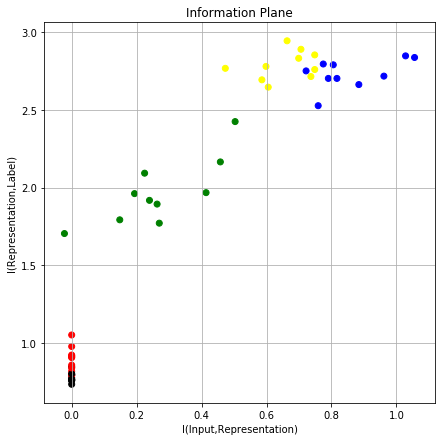

In [20]:
IB.plot(snp_1000)